# 3. УПРАВУВАЊЕ СО ПОДАТОЧНИ МНОЖЕСТВА


(од Томислав Карталов, ФЕИТ, УКИМ, Македонија)

Во ова поглавје, ќе научите да да ги **креирате** податоците рачно, или да ги **увезувате** од постоечки извор и да ги **форматирате** за да одговараат на вашите специфични потреби. Алатките кои се користат се **Jupyter тетратки**, **Python** и **Google Форми**.

Библиотеките што ќе ги користите во ова поглавје се:
- pandas библиотеката за обработка и анализа на податоци,
- numpy библиотеката за математички функции на високо ниво.


In [49]:
import pandas as pd
import numpy as np

## 3.1. Рачно креирање на податочното множество

Податоците може да се креираат (всушност, најчесто, да се приберат) рачно, преку средства како што се **анкети** или **сондажи**. Ако множеството содржи податоци од природата или техниката, може да се креира со помош на мерења, сензори, набљудувања и други уреди и методи за аквизиција на податоци.

Правилната организација на анкетата, паметниот избор на поставените прашања, балансираната структура на испитаниците (возраст, пол, етничка припадност...), како и обезбедувањето анонимност на одговорите се параметри од голема важност за добивање употребливи податоци со висок квалитет. Меѓутоа, објаснувањето на сите овие критериуми излегува надвор од фокусот на овој курс. Заради едноставност, најчесто ќе ги игнорираме тие критериуми, а за возврат нема да тврдиме дека заклучоците извлечени овде имаат некакво значење во реалниот свет. На пример, ако спроведете анкета во вашата училница за најчесто користената мултимедијална социјална мрежа, од податоците можеби ќе заклучите, на пример, дека TikTok е далеку повеќе популарен отколку Instagram. Сепак, овој резултат би бил на некој начин „пристрасен“, бидејќи учесниците во вашето истражување ќе бидат главно тинејџери, а не рамномерно избалансирани возрасни групи. Во реалниот свет, во моментот кога е напишан овој текст, Instagram е двојно поголем од TikTok, но TikTok доминира помеѓу младата популација. Ако сакате да извлечете валидни заклучоци, можеби ќе треба да користите податочни множества создадени од професионални тела, каде што би биле вклучени голем број испитаници со добро балансирана структура.
Со ова кажано, еве како може да се креира податочно множество.


### 3.1.1. Креирање на податочното множество НАВИСТИНА рачно

Ако сте ги добиле вашите податоци на некој класичен начин (на пример, на хартија), ќе мора да ги внесете податоците во дигитална форма (во компјутер). Овој процес е бавен и макотрпен, особено ако работите сами, и тој има смисла да се користи само за многу мали податочни множества.

Да речеме дека сте ги прашале вашите пријатели за нивните навики на мултимедијалните социјални мрежи, па сте составиле ваква листа:

<figure>
<img src="https://github.com/VALENCEML/eBOOK/raw/main/EN/03/HandWrittenList.png" width="500px;"/> 
<figcaption align = "left"> Рачно напишана листа </figcaption>
</figure>

Прво, да ги набљудуваме записите. Човек може лесно да ги разбере овие податоци, но можете ли да ги забележите недоследностите што можат да бидат збунувачки за компјутерот? На пример, ако се обидете да го пресметате просечното време што вашите пријатели го поминуваат дневно на мултимедијалните социјални мрежи, овие податоци не се подготвени за таква пресметка, бидејќи некои од времињата се запишани во часови, други во минути. Понатаму, ако сакате да дојдете до статистиката популарноста на платформите, компјутерот ќе ги смета **FB** и **Facebook** како две различни платформи, иако човек би знаел дека тие две треба да се соберат заедно. (Истото важи и за Insta/Instagram, или YT/YouTube...). Ова нè поттикнува да инсистираме на конзистентни записи, дури и за евентуално подготвување на списоците со можни опции однапред. Некој таков договор за униформизација на податоците би изгледал вака:
- полот ќе биде претставен со големата латинична буква M или F
- времето ќе биде претставено со цел број во минути (без единица мерка, само број)
- платформата ќе биде претставена со стринг (низа од знаци), која е една од оние што се наоѓаат исклучиво на оваа листа: Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat.

По сето ова, конечно можете да го креирате множеството податоци:

In [50]:
friends = pd.DataFrame(columns=['Name','Gender', 'Time Daily [min]', 'Platform'])

Податочното множество го нарековме ***friends***, и моментално тоа е празно (нема податоци, но има структура која е спремна да прими податоци). За да се додаде некој запис во множеството, постојат повеќе начини, еден од нив е да се искористи операторот *'append'*:

In [51]:
friends = friends.append({'Name': 'Zdravko','Gender': 'M', 'Time Daily [min]': '60',  'Platform': 'Facebook'}, ignore_index=True)
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook


Операторот 'append' може да поддржува истовремено додавање на повеќе редови во множеството, но некој сепак ќе треба да ги „отчука“ рачно на тастатура:

In [52]:
friends = friends.append(pd.DataFrame({
                'Name': ['Aleksandra','Ivan'],
                'Gender': ['F','M'], 
                'Time Daily [min]': ['90','120'],  
                'Platform': ['Instagram','TikTok']
                }) , ignore_index=True)
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok


Ако сепак сакаме да додаваме еден по еден ред, побрз и поудобен начин за додавање само еден ред е следнава синтакса:

In [53]:
friends.loc[len(friends.index)] = ['Artim','M', '30', 'Facebook']
friends


,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook


Можете дури и да напишете краток код во програмски циклус кој може да ви помогне за полу)автоматско внесување на податоците. Обидете се да ја завршите горната листа од сликата, или додадете некои од вашите пријатели во податочното множество. Додадете уште најмалку 4 дополнителни луѓе за да добиете множество со барем 8 записи (важно за идните демонстрации, во Секција 3.3.)

In [54]:
keepgoing = True  #initialisation
while keepgoing:  # perform all following commands while keepgoing is True
  Name = input("Name?")
  Gender = input("Gender? [M/F]")
  TimeD = input("Average time spent daily? [in minutes]")
  Platform = input("Social media platform? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]")
  AnotherRecord = input("Make another entry? [y/n]")
  friends.loc[len(friends.index)] = [Name, Gender, TimeD, Platform]
  if AnotherRecord == 'n':
    keepgoing = False # when the user enters 'n', that breaks the loop
friends

Name?Tomas
Gender? [M/F]M
Average time spent daily? [in minutes]60
Social media platform? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]Facebook
Make another entry? [y/n]y
Name?Sara
Gender? [M/F]F
Average time spent daily? [in minutes]90
Social media platform? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]WeChat
Make another entry? [y/n]y
Name?Jelena
Gender? [M/F]F
Average time spent daily? [in minutes]120
Social media platform? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]YouTube
Make another entry? [y/n]y
Name?Vesna
Gender? [M/F]F
Average time spent daily? [in minutes]80
Social media platform? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]TikTok
Make another entry? [y/n]y
Name?Viktor
Gender? [M/F]M\
Average time spent daily? [in minutes]40
Social media platform? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]TikTok
Make another entry? [y/n]n


,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Tomas,M,60,Facebook
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Viktor,M\,40,TikTok


Вашето податочно множество е готово. За анализа и визуелизација на податоците ќе научите во следните поглавја, а засега само мало навестување:


Text(0.5, 1.0, 'Мултимедијалните социјални мрежи на моите пријатели')

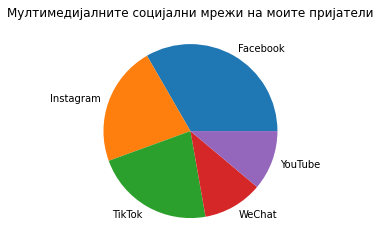

In [57]:
from matplotlib import pyplot as plt
counts = friends.Platform.value_counts()
plt.pie(counts, labels=friends.Platform.value_counts().index.tolist())
plt.title("Мултимедијалните социјални мрежи на моите пријатели") 

Вашето податочно множество моментално постои во таканаречена „податочна рамка“ (еден вид на повеќедимензионална променлива) во работната меморија на компјутерот. Кога ќе ја напуштите оваа сесија, сите податоци ќе бидат изгубени. Ако сакате да ги зачувате податоците за понатамошна употреба, во вид на датотека, во трајната меморија (HDD, SSD, Cloud... ), тоа може да се направи со следните команди:

In [58]:
from google.colab import files
friends.to_csv('friends.csv', encoding = 'utf-8-sig', index=False)
files.download('friends.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

По ова, податочното множество се зачувува локално на компјутерскиот диск, а во следната сесија можете да го увезете и да продолжите да работите со него.

*Понатамошна работа*: обидете се да креирате сопствено податочно множество, со други параметри (еве некои идеи: месеци на раѓање, боја на очи или коса, омилен музички жанр...). Направете анкета меѓу вашите пријатели, креирајте го податочното множество и зачувајте го за понатамошна употреба! Најдете ја датотеката на вашиот компјутер, отворете ја (секој уредувач на текст може да отвора CSV-датотеки или можете да користите уредувач на табеларни пресметки, како н.пр. Excel или Calc), и видете ја структурата на податоците внатре. Ако сакате, во идните демонстрации можете да работите со вашите сопствени податоци, но внимавајте да има најмалку 8 записи, заради компатибилност.


### 3.1.2. Креирање на податочното множество НЕ ТОЛКУ рачно

Како што беше прикажано во претходниот дел, создавањето на податочното множество со рачно внесување е многу бавен и макотрпен процес. Сепак, со тоа што го научивте, усвоивте корисни вештини за управување со податоци, како и знаења за структурирањето на податоците и потребата за нивна конзистентност.
Сега, замислете дека сакате да ја проширите вашата анкета на целиот ваш клас, или можеби дури и на целото училиште. Рачното внесување на податоците станува речиси невозможно за толку големи групи на учесници. Решението на овој проблем е да се искористи некој онлајн формулар или прашалник што може да се дистрибуира до голем број испитаници преку Интернет, користејќи само URL-адреса - таа може лесно да се споделува преку социјалните мрежи или преку чет алатките (Viber, Telegram...), или потрадиционално, преку е-пошта.

Професионалните собирачи на податоци создаваат свои специјализирани онлајн формулари за анкетите што ги спроведуваат. Сепак, постојат некои бесплатни алатки достапни за јавноста, кои се исто така многу погодни. Една од најдобрите и најчесто користените алатки за собирање податоци е [**Google Forms**](https://docs.google.com/forms).

Ајде да се обидеме да ја создадеме истата анкета од претходниот дел, користејќи Google Forms. Ако кликнете на врската погоре, ќе се отвори ново јазиче во вашиот прелистувач, почетната страница на Google Forms, каде што можете да изберете од некои од шаблоните за формулари или едноставно да отворите празен формулар. Ако веќе сте ја користеле оваа алатка, вашите претходно креирани формулари ќе се појават и на оваа страница.

Сега, отворете нов празен формулар и ќе се појави следниов интерфејс:

<figure>
<img src="https://github.com/VALENCEML/eBOOK/raw/main/EN/03/UntitledGoogleForm.png" width="500px;"/> 
<figcaption align = "left"> Празен формулар на Google </figcaption>
</figure>

Во овој интуитивен интерфејс може да се внесат насловот и описот на формуларот, како и прашањата. Заради анонимност, да го замениме прашањето *Name* од претходната анкета, со годината на студирање. За прашањата кои имаат ограничен број можни одговори, како годината на студирање, Формуларите на Google нудат различни типови прашања со обезбедени списоци на одговори, како што се: повеќекратен избор, штиклирачки полиња или паѓачко мени. Ова ја прави конзистентноста на податоците многу полесна за имплементација (за разлика од рачното внесување на податоците).

<figure>
<img src="https://github.com/VALENCEML/eBOOK/raw/main/EN/03/TitledGoogleForm.png" width="500px;"/> 
<figcaption align = "left"> Одговорите се ограничени на дефинирана листа на опции </figcaption>
</figure>

Знакот плус на десната страна, посочен со црвена стрелка на сликата, додава ново прашање. Останатите прашања може да бидат како што се предложени на сликава, но слободно експериментирајте со вашите сопствени идеи.

<figure>
<img src="https://github.com/VALENCEML/eBOOK/raw/main/EN/03/Questions2to4.png" width="500px;"/> 
<figcaption align = "left"> Остатокот од прашањата </figcaption>
</figure>

Кога формуларот е подготвен, копчето **Send** во горниот десен агол го отвора интерфејсот за испраќање, каде што може да се одбере начинот за дистрибуција на формуларот. Може да се дистрибуира преку е-пошта, или преку URL врска што може да се копира и дистрибуира на која било платформа, или пак формуларот може да се вметне во некоја веб-страна.

*Вежба:* Работа во тимови. Поделете го класот во 4 тима (за поголеми класи бројот на тимови може да биде поголем). Секој тим треба да предложи идеја за анкета и да направи формулар за собирање податоци. Потоа, формуларите се дистрибуираат до класот и СЕКОЈ ученик одговара на сите 4 формулари.

По завршувањето на периодот на гласање, резултатите може да се преземат од делот *Responses* на горниот дел од прозорецот за уредување на формуларот и може да се преземат, по можност во формат на датотека *csv* (податоци одделени со запирки).

*Понатамошно читање:* повеќе информации и помош за Формуларите на Google може да најдете [тука] (https://support.google.com/docs).

## 3.2. Увезување на податочното множество

Овде, ќе научите како да увезете веќе постоечко податочно множество. Може да биде креирано од вас, или од други луѓе или институции и се зачувува трајно како датотека на вашиот компјутер или некаде на Интернет. Најчестиот формат на датотека за чување податоци е форматот *csv*, што значи **C**omma **S**eparated **V**alues, или вредности одделени со запирки. Форматот *csv* има неколку предности во однос на другите формати за складирање податоци, некои од предностите се неговата едноставност, пристапност преку стандардни уредувачи како и неговата лесна разбирливост (кога ќе го отворите, веднаш знаете што е што). Ако сте ја направиле вежбата предложена на крајот од Секција 3.1.1. и сте ја отвориле таквата датотека со некоја програма (уредувач на текст или табеларен едитор), веќе сте запознаени со внатрешната структура на тој формат на датотека. Обично првата линија е заглавието на табелата (имиња или описи на податоците, по колони), а сите следни линии се самите податоци, секој податок одвоен од неговата околина со запирка.

Ајде да се обидеме да увеземе сопствено податочно множество што рачно сте го создале и зачувале. Ставете го во посебна податочна рамка, ќе ја наречеме *friends_imported*. Проверете визуелно за да потврдите дека се истите податоци. Дали има некаква разлика?

In [59]:
friends_imported = pd.read_csv('friends.csv')
friends_imported

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Tomas,M,60,Facebook
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Viktor,M,40,Instagram


In [60]:
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Tomas,M,60,Facebook
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Viktor,M,40,Instagram


Всушност, постои разлика помеѓу оригиналната и увезената податочна рамка, но разликата е невидлива за човечкото око. За да ја видите, извршете го следново:

In [61]:
t = friends.dtypes   # this lists the types of data in each column
t

Name                object
Gender              object
Time Daily [min]    object
Platform            object
dtype: object

Додека, истото за увезената податочна рамка:

In [62]:
t2 = friends_imported.dtypes
t2


Name                object
Gender              object
Time Daily [min]     int64
Platform            object
dtype: object

Сега, дали ја гледате разликата? Причината за оваа разлика е конверзијата на типот на параметарот *Time Daily [min]*. Во нашата податочна рамка ги внесувавме времињата во форма на *текст* (пр. внесовме '60', а не 60). Зачувувањето во датотека *csv*, а потоа читањето од неа, ги трансформираше времињата во бројки, бидејќи *pandas* претпоставува дека ако нешто е напишано како број, треба да се чува како број. Внимавајте на ваквото однесување! Како по правило, **секогаш е паметно да ги проверувате типовите** на вашите податоци, особено ако ги увезувате!!! Ќе се навратиме на оваа дискусија во делот 3.3.2.1.

*Понатамошна работа:* Иако форматот *csv* најчесто се користи за складирање податоци, тој има свои ограничувања кога треба да се складираат посложени структури на податоци. Библиотеката *pandas* нуди поддршка за неколку формати за складирање податоци, покрај *csv*, може да чита и *excel*, *sql*, *json*, *html* и други типови на датотеки. Обидете се да го зачувате, а потоа да го прочитате вашето сопствено податочно множество во некои од другите формати. Помеѓу запишувањето и читањето, проверете ја датотеката зачувана на компјутерот, ако можете отворете ја со соодветна програма, и набљудувајте ја нејзината внатрешна структура.
Еве неколку предлози:
- *dataframe*.to_excel / pd.read_excel
- *dataframe*.to_json / pd.read_json
- *dataframe*.to_html / pd.read_html
- *dataframe*.to_xml / pd.read_xml

Употребата е слична на она што веќе го научивте погоре, меѓутоа, доколку ви се потребни, деталните упатства можете да ги најдете  [тука](https://pandas.pydata.org/docs/reference/io.html).

### 3.2.1. Онлајн податочни сервиси


Во некои случаи, ќе биде невозможно да се создадат сопствени податочни множества. Можете да добиете обемни и професионално креирани податоци од некои од онлајн сервисите. Еве неколку такви сервиси што би можело да биде корисно да се знаат:
- [kaggle](https://www.kaggle.com/datasets), (разни податоци, од извори на заедницата)
- [Google Dataset](https://datasetsearch.research.google.com/), (разни податоци, од Google)
- [Глобално здравје](https://apps.who.int/gho/data/node.home), (здравствени податоци, од СЗО)
- [Datahub.io](https://datahub.io/collections), (најчесто бизнис и финансии)
-[CrimeExplorer](https://crime-data-explorer.fr.cloud.gov/), (податоци за криминал, од ФБИ)
- [EarthData](https://earthdata.nasa.gov/), (податоци за животната средина, од НАСА)
- [Отворени податоци на ЦЕРН](http://opendata.cern.ch/), (податоци за физика на честички, од ЦЕРН)


Сите овие сервиси се бесплатни, некои од нив бараат отворање на корисничка сметка (регистрација), други се достапни без регистрација.


## 3.3. Управување со податочното множество

Сега знаете како да ги креирате, зачувувате и увезувате вашите податоци. Пред да започнете со аналитика и нивна обработка, треба да знаете уште неколку основни работи за управувањето со вашето податочно множество.

### 3.3.1. Пристап до избрани делови од податоците (селекција)

За референца, еве го повторно целото податочно множество:

In [63]:
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Tomas,M,60,Facebook
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Viktor,M,40,Instagram


Првата колона за која во заглавието не е наведено име, всушност се вика **„индекс“**. За пристап до одреден запис од множеството, може да се искористи операторот *loc*. Овој оператор го наоѓа записот со одреден индекс. 

In [64]:
friends.loc[3]

Name                   Artim
Gender                     M
Time Daily [min]          30
Platform            Facebook
Name: 3, dtype: object

Ако не ви се потребни сите информации за тој запис, туку ви треба само една конкретна информација, тогаш можете потесно да го специфицирате пребарувањето:

In [65]:
friends.loc[3,'Platform']

'Facebook'

Исто така, може да се пристапи до повеќе индекси истовемено, подредени или произволни:

In [66]:
friends.loc[2:4]    # пристап до записи со подредени индекси

,Name,Gender,Time Daily [min],Platform
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Tomas,M,60,Facebook


In [67]:
friends.loc[{0,6,4,7}]     # пристап до записи со произволни индекси

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
4,Tomas,M,60,Facebook
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok


Досегашните примери покажуваат како да пристапите до податоците по редови. Ако треба да се пристапи до колоните, на пример, сакате да ги видите сите имиња во податочната рамка, тогаш:

In [68]:
friends['Name']

0       Zdravko
1    Aleksandra
2          Ivan
3         Artim
4         Tomas
5          Sara
6        Jelena
7         Vesna
8        Viktor
Name: Name, dtype: object

За извлекување на повеќе колони од множество податоци, треба да се користи листа - имињата се наредени во големи загради {}.

In [69]:
friends[{'Gender','Platform'}]

,Gender,Platform
0,M,Facebook
1,F,Instagram
2,M,TikTok
3,M,Facebook
4,M,Facebook
5,F,WeChat
6,F,YouTube
7,F,TikTok
8,M,Instagram


Понекогаш, не го знаете индексот на записот што сакате да го пристапите, но знаете некои други информации. Во тој случај, наместо да ставите број како индекс, можете да користите некој логички критериум:

In [70]:
friends['Name']=='Ivan'

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7    False
8    False
Name: Name, dtype: bool

Ако овој резултат се искористи како индекс во операторот *loc*, тој ќе ги врати **само** записите каде што логичкиот критериум е вистинит!

In [71]:
friends.loc[friends['Name']=='Ivan']

,Name,Gender,Time Daily [min],Platform
2,Ivan,M,120,TikTok


Овој „трик“ може да се користи за филтрирање на податоците. На пример, ајде да видиме кој користи TikTok:

In [72]:
friends.loc[friends['Platform']=='TikTok']

,Name,Gender,Time Daily [min],Platform
2,Ivan,M,120,TikTok
7,Vesna,F,80,TikTok


Забележете како во сите овие случаи добивате подмножества од оригиналното податочно множество. Секое од нив ги наследува оригиналните индекси, па може да се користи како посебно податочно множество, доколку е потребно. За таа цел, избраното подмножество може да се додели на нова податочна рамка (нова променлива).

*Вежба:* пробајте некои ваши идеи за прикажување избрани делови од податочното множество. Пробајте и различни критериуми за филтрирање на податоците.

### 3.3.2. Менување на податоците

Кога сте ги совладале техниките за пристап до податоци, менувањето на податоците е многу едноставно. Треба само да доделите нова вредност на избраните податоци. Ајде да се обидеме да замениме некој запис (на пример, индекс = 4) со друг.

Пристапување (избирање) на записот:

In [73]:
friends.loc[4]

Name                   Tomas
Gender                     M
Time Daily [min]          60
Platform            Facebook
Name: 4, dtype: object

И доделување на нови вредности на избраниот запис:

In [74]:
friends.loc[4] = ['Maryna','F','80','Instagram']
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Maryna,F,80,Instagram
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Viktor,M,40,Instagram


Ако треба да се измени само една вредност, се применуваат сите досега наведени критериуми за избор. 

Пример:Измена на вредност во фиксен ред (познат индекс).

In [75]:
friends.loc[4, 'Time Daily [min]'] = '120'
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Maryna,F,120,Instagram
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Viktor,M,40,Instagram


Пример: измена на вредност базирана на критериум (непознат индекс):

In [77]:
friends.loc[friends['Name']=='Maryna', 'Name'] = 'Marina'  # практично, ова е "find and replace" функцијата!
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Viktor,M,40,Instagram


Користете го ова паметно и внимателно, бидејќи **нема копче за „undo“**! Ако правилото е исполнето за повеќе редови, **сите ќе бидат изменети**!


In [79]:
friends2 = friends.copy()  # прво, да ги ископираме податоците во друга податочна рамка...
friends2.loc[friends2['Gender']=='M', 'Name'] = 'Oliver'  # ...бидејќи оваа наредба практично ги уништува податоците! (Освен ако не сте сигурни дека навистина сите машки се викаат Оливер :) )
friends2

,Name,Gender,Time Daily [min],Platform
0,Oliver,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Oliver,M,120,TikTok
3,Oliver,M,30,Facebook
4,Marina,F,120,Instagram
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Oliver,M,40,Instagram


*Вежба:* Дали направивте некои грешки кога рачно ги внесовте пријателите? Можеби некоја буква се лизна во бројките? Или можеби сте напишале „М<“ за полот? Обидете се да ги исчистите податоците и да ги поправите сите грешки, со помош на техниките за менување на податоци кои туку што ги научивте!

#### 3.3.2.1. Прилагодување на типот на податоци

Создадената рамка за податоци содржи некои броеви. Ајде да се обидеме да направиме некоја пресметка со нив, на пр. да се добие просечното поминато време на социјалните мрежи, за сите учесници во анкетата.

In [80]:
friends['Time Daily [min]'].mean()


6.76680033467668e+19

Дали сметате дека оваа бројка е точна? Можете да ја проверите со рачна пресметка, користејќи ја целата податочна рамка.

In [81]:
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Viktor,M,40,Instagram


Очигледно има некои проблеми пресметката. Сега да ја пробаме истата пресметка со увезената податочна рамка:

In [82]:
friends_imported['Time Daily [min]'].mean()

76.66666666666667

Ова веќе изгледа како точна бројка. Проблемот со пресметаното просечно време од оригиналната рамка за податоци е во типот на податоци од колоната „Time Daily [min]“

In [83]:
t = friends.dtypes
t

Name                object
Gender              object
Time Daily [min]    object
Platform            object
dtype: object

Бидејќи времињата (во минути) ги внесовме како текстуални променливи, тие се чуваат како низа од знаци. „60“ минути не е бројот 60, туку знаците „6“ и „0“, што ја загрозува пресметката и враќа таков нелогичен број како погоре. Решението на овој проблем е конвертирање (cast) на сите дневни времиња во базата на податоци од текст во бројки. Тоа може да се изврши со:

In [84]:
friends['Time Daily [min]'] = friends['Time Daily [min]'].apply(pd.to_numeric)
t = friends.dtypes
t


Name                object
Gender              object
Time Daily [min]     int64
Platform            object
dtype: object

Сега, повторниот обид за пресметка на просекот би бил:

In [85]:
friends['Time Daily [min]'].mean()

83.33333333333333

Дали овој број повеќе одговара на вашата рачна пресметка?

Доколку е потребна конверзија во спротивна насока (броеви во низи од знаци), тогаш командата станува:

In [86]:
friends['Time Daily [min]'] = friends['Time Daily [min]'].apply(str)
t = friends.dtypes
t


Name                object
Gender              object
Time Daily [min]    object
Platform            object
dtype: object

Истиот резултат може да се постигне ако се додели текстуална вредност на некое нумеричко поле во податочната рамка, тогаш *pandas* автоматски ќе го конвертира полето во стринг. Сепак, овој пристап не се препорачува, бидејќи мало невнимание може да доведе до хаотични типови на податоци низ целото податочно множество.


### 3.3.3. Бришење (делови од) податоците

Понекогаш, делови од податочната рамка повеќе не се потребни или треба да се исклучат од понатамошната анализа. Еден начин да се направи тоа е да се избере релевантниот дел од податочната рамка и да се додели на друга (нова) податочна рамка, но во некои случаи поедноставното решение е да се избришат непотребните податоци.

In [87]:
friends2 = friends.copy()   # прво ќе креираме нова податочна рамка, за да вежбаме на неа
friends2

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Viktor,M,40,Instagram


За парцијално бришење на податоци, се користи операторот *drop*. 


In [88]:
friends2.drop([5])    # Бришење на одреден запис (познат индекс):

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Viktor,M,40,Instagram


Набљудувајте како се зачувуваат оригиналните индекси. Податочното множество не се реиндексира по отстранување на записот.
Бришење на повеќе записи:

In [89]:
friends2.drop([0, 3, 7])

,Name,Gender,Time Daily [min],Platform
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
4,Marina,F,120,Instagram
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
8,Viktor,M,40,Instagram


Забележете дека редот со индекс=5 кој погоре го избришавме, сега се вратил во податоците. Тоа е затоа што горенаведениот резултат е извршен врз безбедна копија од податочната рамка, а не на оригиналот. Бидејќи веќе сте ги копирале оригиналните податоци, можете да присилите трајно бришење во самата податочна рамка, користејќи го параметарот *inplace*.

In [90]:
friends2.drop([0, 3, 7],inplace=True)
friends2 # сега резултатот мора да биде експлицитно прикажан, со наредба

,Name,Gender,Time Daily [min],Platform
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
4,Marina,F,120,Instagram
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
8,Viktor,M,40,Instagram


Бришење според правило / логички критериум (непознат индекс):

In [91]:
friends2.drop(friends2[friends2['Gender']=='F'].index, inplace=True)   # отстранување на сите женски лица од податочното множество
friends2

,Name,Gender,Time Daily [min],Platform
2,Ivan,M,120,TikTok
8,Viktor,M,40,Instagram


#### Бришење на колони:

In [92]:
friends2 = friends.copy()   # прво да ги вратиме сите податоци
friends2


,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Viktor,M,40,Instagram


Параметарот *axis=1* мора да биде наведен за бришење колона. Тој може да биде назначен и при бришење на редови (*axis=0*), но не е задолжително, бидејќи ако не е наведено, претпоставката е дека се бришат редови.

In [93]:
friends2.drop(['Name'], axis=1, inplace=True)  # бришење на сите имиња (анонимизација на множеството)
friends2

,Gender,Time Daily [min],Platform
0,M,60,Facebook
1,F,90,Instagram
2,M,120,TikTok
3,M,30,Facebook
4,F,120,Instagram
5,F,90,WeChat
6,F,120,YouTube
7,F,80,TikTok
8,M,40,Instagram


*Вежба:* : Обидете се да ги отстраните од множеството сите записи на луѓе кои поминале на социјалните мрежи помалку време од просечното. Сетете се пред да бришете, да ги заштитите оригиналните податоци.

### 3.3.4. Комбинирање на податоците

Во некои ситуации, податоците од повеќе извори треба да се спојат/комбинираат во едно множество. За да го симулирате тоа сценарио, извршете го следново:

In [94]:
friends1 = friends.copy()  
friends2 = friends.copy()  
friends1.drop([0, 2, 5],inplace=True)    # отстрануваме по неколку редови од секоја податочна рамка
friends2.drop([1, 3, 7],inplace=True)    # со цел да ги направиме рамките различни една од друга
friends1


,Name,Gender,Time Daily [min],Platform
1,Aleksandra,F,90,Instagram
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Viktor,M,40,Instagram


In [95]:
friends2

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
2,Ivan,M,120,TikTok
4,Marina,F,120,Instagram
5,Sara,F,90,WeChat
6,Jelena,F,120,YouTube
8,Viktor,M,40,Instagram


Моментално имате две различни податочни множества. Операторот *concat* може да се искористи за нивно спојување во едно множество. Новото множество ќе го сместиме во податочна рамка која ќе ја викаме *friends_all*

In [96]:
friends_all = pd.concat([friends1, friends2])
friends_all

,Name,Gender,Time Daily [min],Platform
1,Aleksandra,F,90,Instagram
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
6,Jelena,F,120,YouTube
7,Vesna,F,80,TikTok
8,Viktor,M,40,Instagram
0,Zdravko,M,60,Facebook
2,Ivan,M,120,TikTok
4,Marina,F,120,Instagram
5,Sara,F,90,WeChat


Забележете сега како редоследот на индексите е уништен, а новото податочно множество содржи индекси кои не се уникатни (единствени). Ова генерално не претставува проблем за операциите со податоците, но мора да бидете многу внимателни, бидејќи сега повеќе записи може да имаат ист индекс.
Ако сакате новото податочно множество да се ре-индексира, и да постави нови, подредени индекси, тогаш треба да се користи прекинувачот *ignore_index*:

In [97]:
friends_all = pd.concat([friends1, friends2], ignore_index = True)
friends_all

,Name,Gender,Time Daily [min],Platform
0,Aleksandra,F,90,Instagram
1,Artim,M,30,Facebook
2,Marina,F,120,Instagram
3,Jelena,F,120,YouTube
4,Vesna,F,80,TikTok
5,Viktor,M,40,Instagram
6,Zdravko,M,60,Facebook
7,Ivan,M,120,TikTok
8,Marina,F,120,Instagram
9,Sara,F,90,WeChat


Или, доколку сакате да ги зачувате старите индекси (можеби има имплементирано некои анализи кои работат со нив), но сепак ви е потребно секој запис да биде уникатно пристаплив, тогаш можете да додадете уште еден индекс, со повисока хиерархиска вредност од стариот.

In [98]:
friends_all = pd.concat([friends1, friends2], keys=['fr1','fr2'])
friends_all

Name Gender Time Daily [min]   Platform
fr1 1  Aleksandra      F               90  Instagram
    3       Artim      M               30   Facebook
    4      Marina      F              120  Instagram
    6      Jelena      F              120    YouTube
    7       Vesna      F               80     TikTok
    8      Viktor      M               40  Instagram
fr2 0     Zdravko      M               60   Facebook
    2        Ivan      M              120     TikTok
    4      Marina      F              120  Instagram
    5        Sara      F               90     WeChat
    6      Jelena      F              120    YouTube
    8      Viktor      M               40  Instagram

Сега, секој запис е уникатно пристаплив и може да му биде доделена различна вредност:

In [99]:
friends_all.loc['fr1'].loc[4,'Platform'] = 'TikTok'
friends_all.loc['fr2'].loc[4,'Platform'] = 'Instagram'
friends_all

Name Gender Time Daily [min]   Platform
fr1 1  Aleksandra      F               90  Instagram
    3       Artim      M               30   Facebook
    4      Marina      F              120     TikTok
    6      Jelena      F              120    YouTube
    7       Vesna      F               80     TikTok
    8      Viktor      M               40  Instagram
fr2 0     Zdravko      M               60   Facebook
    2        Ivan      M              120     TikTok
    4      Marina      F              120  Instagram
    5        Sara      F               90     WeChat
    6      Jelena      F              120    YouTube
    8      Viktor      M               40  Instagram

Што е со податочните множества кои имаат различни структури? Да претпоставиме дека имате две податочни множества, едното го испитува присуството на учениците на социјалните мрежи, а другото ги содржи резултатите од тестовите. Некои од учениците може да ги има и во двете множества, некои може да ги има само во едно од нив. За да го илустрирате таквото сценарио, прво, извршете ги следните промени на *friends2*:

In [100]:
friends2['Time Daily [min]'] = friends2['Time Daily [min]'].apply(pd.to_numeric)
friends2 = friends2.rename(columns={'Time Daily [min]':'Test Score'}) # менување име на колоната
friends2['Test Score'] = friends2['Test Score'] + 48   # менување на вредностите на податоците во колоната, со цел да бидат различни од претходните (симулираме други податоци тука)
friends2

,Name,Gender,Test Score,Platform
0,Zdravko,M,108,Facebook
2,Ivan,M,168,TikTok
4,Marina,F,168,Instagram
5,Sara,F,138,WeChat
6,Jelena,F,168,YouTube
8,Viktor,M,88,Instagram


Сега, комбинацијата на двете множества резултира во:

In [101]:
friends_all = pd.concat([friends1, friends2])
friends_all

,Name,Gender,Time Daily [min],Platform,Test Score
1,Aleksandra,F,90,Instagram,NaN
3,Artim,M,30,Facebook,NaN
4,Marina,F,120,Instagram,NaN
6,Jelena,F,120,YouTube,NaN
7,Vesna,F,80,TikTok,NaN
8,Viktor,M,40,Instagram,NaN
0,Zdravko,M,NaN,Facebook,108.0
2,Ivan,M,NaN,TikTok,168.0
4,Marina,F,NaN,Instagram,168.0
5,Sara,F,NaN,WeChat,138.0


Забележете ги *NaN*-овите. Податоците кои не се познати, во здруженото множество се претставени со *NaN*.
Овој резултат е донекаде употреблив, но за вистинско меѓусебно „вчешлување“ на податоците, потребни се уште неколку чекори. Прво, ајде да ги пронајдеме записите што постојат во двете почетни множества. Тие ќе ги сместиме во нова податочна рамка што ќе ја викаме *friends_common*


In [102]:
friends_common = friends1.merge(friends2,on=['Name','Gender','Platform'])  # Ако се работи за истите студенти, тогаш параметрите Name, Gender и Platform би требало да бидат исти во обете почетни множества
friends_common


,Name,Gender,Time Daily [min],Platform,Test Score
0,Marina,F,120,Instagram,168
1,Jelena,F,120,YouTube,168
2,Viktor,M,40,Instagram,88


Ова што го добивме претставува добро вчешлана листа, во која се присутни податоците и за времето поминато на социјални мрежи, и за резултатите од тестовите. Следниот чекор е, бидејќи сега имаме посебна податочна рамка за „заедничките“ ученици, треба овие ученици да ги избришеме од рамката *friends_all*. Тоа ќе го направиме со следниот краток циклусен код:

In [103]:
for i in range (len(friends_common.index)):   
  friends_all.drop(friends_all[friends_all['Name']==friends_common.loc[i,'Name']].index, inplace=True)  # обиди се да го анализираш и да го разбереш овој код. 
  #Повеќе концепти на селекција, бришење и доделување се употребени во иста линија! 
  #Дали согледуваш можни проблематични сценарија во работењето на овој код? На пример, што ако имаш пријатели со исти имиња, но тие се различни записи во множеството?
  #Вежба(напредно, самостојна работа): обиди се да додадеш повеќе критериуми за да го остраниш проблемот на ненарачано бришење на записи со исти имиња!
friends_all

,Name,Gender,Time Daily [min],Platform,Test Score
1,Aleksandra,F,90,Instagram,NaN
3,Artim,M,30,Facebook,NaN
7,Vesna,F,80,TikTok,NaN
0,Zdravko,M,NaN,Facebook,108.0
2,Ivan,M,NaN,TikTok,168.0
5,Sara,F,NaN,WeChat,138.0


На крајот, рамката со заедничките ученици треба да се додаде на она што остана од податоците:

In [104]:
friends_all = pd.concat([friends_all, friends_common],ignore_index=True)
friends_all

,Name,Gender,Time Daily [min],Platform,Test Score
0,Aleksandra,F,90,Instagram,NaN
1,Artim,M,30,Facebook,NaN
2,Vesna,F,80,TikTok,NaN
3,Zdravko,M,NaN,Facebook,108.0
4,Ivan,M,NaN,TikTok,168.0
5,Sara,F,NaN,WeChat,138.0
6,Marina,F,120,Instagram,168.0
7,Jelena,F,120,YouTube,168.0
8,Viktor,M,40,Instagram,88.0


Податоците од двете листи се целосно споени, а за учениците што постојат во двете множества, податоците се соодветно внесени.

*Вежба:* од базата на податоци *friends_all* изберете ги сите записи што не содржат податоци за „Time Daily [min]“, во посебна податочна рамка. Потоа, со преименување и бришење на колоните, направете колоната за резултатите од тестовите да биде колона за „Time Daily [min]“. На крај, додајте ги тие записи назад во податочното множество *friends_all*, на дното од табелата.